# Feature Weights from SelectKBest

Determine where the number of features returned from SelectKBest asymptotes by plotting weights

# Inputs

In [3]:
from sklearn.feature_selection import SelectKBest

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in centered data
df = pd.read_hdf('/mnt/data/expression/tcga_gtex_tpm_norm_filt_centered.hd5')
# Subset
gtex = df[df.label == 'gtex'].sort_values('tissue')
normal = df[df.label == 'tcga-normal'].sort_values('tissue')
tumor = df[df.label == 'tcga-tumor'].sort_values('tissue')
# Read in drug genes
genes = df.columns[5:]
drug_genes = [x.split('\t')[0] for x in open('../data/druggable-genes.tsv', 'r').readlines()]
drug_genes = [x for x in drug_genes if x in df.columns]

# Normal

In [4]:
n = 1000
k = SelectKBest(k=n)

In [6]:
k.fit(normal[genes], normal.tissue)

SelectKBest(k=1000, score_func=<function f_classif at 0x7f5cf67b38c8>)

Get the indices sorted by most important to least important

In [9]:
indices = np.argsort(k.scores_)[::-1]

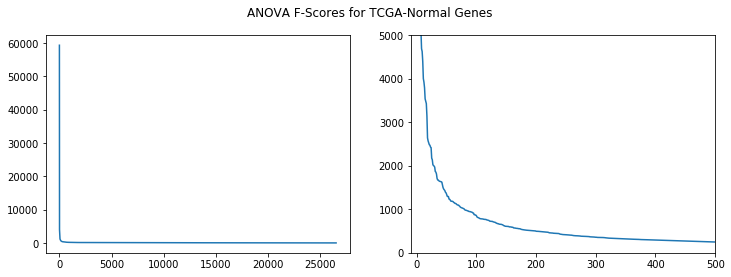

In [28]:
_, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.lineplot(range(len(indices)), k.scores_[indices], ax=ax[0])
sns.lineplot(range(len(indices)), k.scores_[indices], ax=ax[1])
ax[1].set_xlim([-10, 500])
ax[1].set_ylim([0, 5000])
plt.suptitle("ANOVA F-Scores for TCGA-Normal Genes");

# GTEx

In [29]:
n = 1000
k = SelectKBest(k=n)

In [30]:
k.fit(gtex[genes], gtex.tissue)

SelectKBest(k=1000, score_func=<function f_classif at 0x7f5cf67b38c8>)

In [31]:
indices = np.argsort(k.scores_)[::-1]

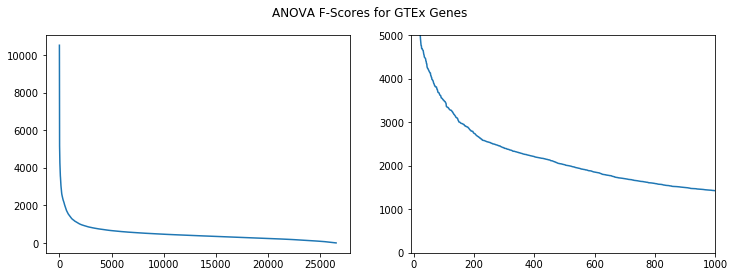

In [33]:
_, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.lineplot(range(len(indices)), k.scores_[indices], ax=ax[0])
sns.lineplot(range(len(indices)), k.scores_[indices], ax=ax[1])
ax[1].set_xlim([-10, 1000])
ax[1].set_ylim([0, 5000])
plt.suptitle("ANOVA F-Scores for GTEx Genes");